In [857]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 

In [858]:
camera = pd.read_csv("Cameras Dataset 2006-2010.csv")

In [859]:
camera

,OBJECTID,STATEWIDE_ID,DISTRICT_ID,STATUS_ID,MPMS_PROJ_ID,PLAN_DEPLOY_YEAR,INSTALL_TYPE_ID,STRUCT_TYPE_ID,POLE_HEIGHT,LOC_DISTRICT_NO,...,IS_FROM_REGIONAL,IS_FROM_ROPS,IS_FROM_MPMS,RECORD_UPDATE,ID,GIS_UPDATE_DATE,GIS_GEOMETRY_UPDATE_DATE,SE_ANNO_CAD_DATA,GPID,Has Geometry
0,8467,CAM-06-293,CM 179,1,64479.0,2009,1,8,55.0,6,...,NaN,NaN,NaN,3/25/2024 8:51:05 PM,590,8/5/2019 1:14:05 PM,8/5/2019 1:14:05 PM,NaN,8467,Y
1,8468,CAM-06-294,CM 2301,1,62616.0,2009,1,8,55.0,6,...,NaN,NaN,NaN,3/25/2024 8:51:06 PM,591,8/5/2019 1:14:05 PM,8/5/2019 1:14:05 PM,NaN,8468,Y
2,8469,CAM-06-295,CM 2302,1,62616.0,2009,1,8,55.0,6,...,NaN,NaN,NaN,3/25/2024 8:51:06 PM,592,8/5/2019 1:14:05 PM,8/5/2019 1:14:05 PM,NaN,8469,Y
3,8470,CAM-06-296,CM 2303,1,62616.0,2009,1,8,55.0,6,...,NaN,NaN,NaN,3/25/2024 8:51:06 PM,593,8/5/2019 1:14:05 PM,8/5/2019 1:14:05 PM,NaN,8470,Y
4,8471,CAM-06-297,CM 3071,1,64479.0,2008,1,8,55.0,6,...,NaN,NaN,NaN,3/25/2024 8:51:07 PM,594,8/5/2019 1:14:05 PM,8/5/2019 1:14:05 PM,NaN,8471,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,7977,CAM-08-060,C_D8_83-24,1,NaN,2010,1,7,55.0,8,...,NaN,NaN,NaN,3/25/2024 10:12:51 PM,70,8/5/2019 1:14:05 PM,8/5/2019 1:14:05 PM,NaN,7977,Y
346,7979,CAM-08-062,C_D8_83-31,1,NaN,2010,1,7,55.0,8,...,NaN,NaN,NaN,3/25/2024 10:12:52 PM,72,8/5/2019 1:14:05 PM,8/5/2019 1:14:05 PM,NaN,7979,Y
347,7996,CAM-08-079,C_D8_22-PA 39,1,NaN,2010,1,7,55.0,8,...,NaN,NaN,NaN,3/25/2024 10:13:00 PM,89,8/5/2019 1:14:05 PM,8/5/2019 1:14:05 PM,NaN,7996,Y
348,8001,CAM-08-084,C_D8_30-PA 283,1,NaN,2010,1,7,55.0,8,...,NaN,NaN,NaN,3/25/2024 10:13:03 PM,94,8/5/2019 1:14:05 PM,8/5/2019 1:14:05 PM,NaN,8001,Y


### Load Accident DATA

In [860]:
def read_crash_data(year):
    file_path = f"Philadelphia_{year}/CRASH_Philadelphia_{year}.csv"
    crash_data = pd.read_csv(file_path, low_memory=False)
    return crash_data

for year in range(2006, 2011):
    globals()[f"crash{year}"] = read_crash_data(year)
    print(f"crash{year} with shape: {globals()[f'crash{year}'].shape}")

crash2006 with shape: (11753, 100)
crash2007 with shape: (11625, 100)
crash2008 with shape: (10676, 100)
crash2009 with shape: (10742, 100)
crash2010 with shape: (11070, 100)


In [861]:
def read_crash_data(year):
    file_path = f"Philadelphia_{year}/FLAG_Philadelphia_{year}.csv"
    crash_data = pd.read_csv(file_path)
    return crash_data

for year in range(2006, 2011):
    globals()[f"flag{year}"] = read_crash_data(year)
    print(f"flag{year} with shape: {globals()[f'flag{year}'].shape}")

flag2006 with shape: (11753, 120)
flag2007 with shape: (11625, 120)
flag2008 with shape: (10676, 120)
flag2009 with shape: (10742, 120)
flag2010 with shape: (11070, 120)


In [862]:
def read_crash_data(year):
    file_path = f"Philadelphia_{year}/ROADWAY_Philadelphia_{year}.csv"
    crash_data = pd.read_csv(file_path)
    return crash_data

for year in range(2006, 2011):
    globals()[f"roadway{year}"] = read_crash_data(year)
    print(f"roadway{year} with shape: {globals()[f'roadway{year}'].shape}")

roadway2006 with shape: (21540, 13)
roadway2007 with shape: (20227, 13)
roadway2008 with shape: (18267, 13)
roadway2009 with shape: (19312, 13)
roadway2010 with shape: (19678, 13)


In [863]:
roadway2006

,CRN,ACCESS_CTRL,ADJ_RDWY_SEQ,LANE_COUNT,OFFSET,RDWY_COUNTY,RDWY_ORIENT,RDWY_SEQ_NUM,ROAD_OWNER,ROUTE,SEGMENT,SPEED_LIMIT,STREET_NAME
0,2006062399,3.0,4,2,1602.0,67,E,4,2,1016,60.0,35.0,LINDEN AV
1,2006055305,NaN,4,1,502.0,67,U,3,2,8012,20.0,35.0,NaN
2,2006034194,3.0,5,2,0.0,67,NaN,5,2,4007,10.0,25.0,CLARISSA ST
3,2006079948,3.0,3,2,2250.0,67,N,3,2,1005,130.0,25.0,CASTOR AV
4,2006094184,3.0,4,2,0.0,67,W,4,2,2014,51.0,25.0,LEHIGH AV
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21535,2007022296,NaN,4,2,NaN,67,W,4,4,NaN,NaN,25.0,ASHLAND AV
21536,2007010239,NaN,3,2,NaN,67,N,4,4,NaN,NaN,NaN,22ND ST
21537,2006105138,3.0,3,2,1550.0,67,N,3,2,1020,20.0,35.0,PHILMONT AV
21538,2007022731,3.0,3,3,957.0,67,N,3,2,3007,150.0,35.0,KELLY DR


In [864]:
flag2006

,CRN,AGGRESSIVE_DRIVING,ALCOHOL_RELATED,ANGLE_CRASH,ATV,BACKUP_CONGESTION,BACKUP_NONRECURRING,BACKUP_PRIOR,BICYCLE,CELL_PHONE,...,UNLICENSED,UNSIGNALIZED_INT,URBAN,VEHICLE_FAILURE,VEHICLE_TOWED,VULNERABLE_ROAD_USER,VULNERABLE_ROAD_USER_FATAL,WET_ROAD,WORK_ZONE,YOUNG_DRIVER
0,2006033283,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2006123825,0,0,1,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
2,2006113461,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2006080851,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2006103260,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11748,2006062720,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
11749,2007007551,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
11750,2006054944,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
11751,2007007577,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [865]:
crash2006

,CRN,ARRIVAL_TM,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,CHLDPAS_DEATH_COUNT,...,WORK_ZONE_TYPE,WORKERS_PRES,WZ_CLOSE_DETOUR,WZ_FLAGGER,WZ_LAW_OFFCR_IND,WZ_LN_CLOSURE,WZ_MOVING,WZ_OTHER,WZ_SHLDER_MDN,WZ_WORKERS_INJ_KILLED
0,2006103675,635.0,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006096594,1422.0,2,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006096609,2023.0,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006102080,1800.0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006125746,1753.0,1,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11748,2007022372,2320.0,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11749,2007022817,2219.0,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11750,2007022849,305.0,2,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11751,2007022740,1305.0,2,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [866]:
camera

,OBJECTID,STATEWIDE_ID,DISTRICT_ID,STATUS_ID,MPMS_PROJ_ID,PLAN_DEPLOY_YEAR,INSTALL_TYPE_ID,STRUCT_TYPE_ID,POLE_HEIGHT,LOC_DISTRICT_NO,...,IS_FROM_REGIONAL,IS_FROM_ROPS,IS_FROM_MPMS,RECORD_UPDATE,ID,GIS_UPDATE_DATE,GIS_GEOMETRY_UPDATE_DATE,SE_ANNO_CAD_DATA,GPID,Has Geometry
0,8467,CAM-06-293,CM 179,1,64479.0,2009,1,8,55.0,6,...,NaN,NaN,NaN,3/25/2024 8:51:05 PM,590,8/5/2019 1:14:05 PM,8/5/2019 1:14:05 PM,NaN,8467,Y
1,8468,CAM-06-294,CM 2301,1,62616.0,2009,1,8,55.0,6,...,NaN,NaN,NaN,3/25/2024 8:51:06 PM,591,8/5/2019 1:14:05 PM,8/5/2019 1:14:05 PM,NaN,8468,Y
2,8469,CAM-06-295,CM 2302,1,62616.0,2009,1,8,55.0,6,...,NaN,NaN,NaN,3/25/2024 8:51:06 PM,592,8/5/2019 1:14:05 PM,8/5/2019 1:14:05 PM,NaN,8469,Y
3,8470,CAM-06-296,CM 2303,1,62616.0,2009,1,8,55.0,6,...,NaN,NaN,NaN,3/25/2024 8:51:06 PM,593,8/5/2019 1:14:05 PM,8/5/2019 1:14:05 PM,NaN,8470,Y
4,8471,CAM-06-297,CM 3071,1,64479.0,2008,1,8,55.0,6,...,NaN,NaN,NaN,3/25/2024 8:51:07 PM,594,8/5/2019 1:14:05 PM,8/5/2019 1:14:05 PM,NaN,8471,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,7977,CAM-08-060,C_D8_83-24,1,NaN,2010,1,7,55.0,8,...,NaN,NaN,NaN,3/25/2024 10:12:51 PM,70,8/5/2019 1:14:05 PM,8/5/2019 1:14:05 PM,NaN,7977,Y
346,7979,CAM-08-062,C_D8_83-31,1,NaN,2010,1,7,55.0,8,...,NaN,NaN,NaN,3/25/2024 10:12:52 PM,72,8/5/2019 1:14:05 PM,8/5/2019 1:14:05 PM,NaN,7979,Y
347,7996,CAM-08-079,C_D8_22-PA 39,1,NaN,2010,1,7,55.0,8,...,NaN,NaN,NaN,3/25/2024 10:13:00 PM,89,8/5/2019 1:14:05 PM,8/5/2019 1:14:05 PM,NaN,7996,Y
348,8001,CAM-08-084,C_D8_30-PA 283,1,NaN,2010,1,7,55.0,8,...,NaN,NaN,NaN,3/25/2024 10:13:03 PM,94,8/5/2019 1:14:05 PM,8/5/2019 1:14:05 PM,NaN,8001,Y


### Data Cleaning

In [867]:
def print_column_names_with_index(df):
    print("Column names and their index locations:")
    for i, column_name in enumerate(df.columns):
        print(f"{i} Column '{column_name}'")

print_column_names_with_index(crash2006)

Column names and their index locations:
0 Column 'CRN'
1 Column 'ARRIVAL_TM'
2 Column 'AUTOMOBILE_COUNT'
3 Column 'BELTED_DEATH_COUNT'
4 Column 'BELTED_SUSP_SERIOUS_INJ_COUNT'
5 Column 'BICYCLE_COUNT'
6 Column 'BICYCLE_DEATH_COUNT'
7 Column 'BICYCLE_SUSP_SERIOUS_INJ_COUNT'
8 Column 'BUS_COUNT'
9 Column 'CHLDPAS_DEATH_COUNT'
10 Column 'CHLDPAS_SUSP_SERIOUS_INJ_COUNT'
11 Column 'COLLISION_TYPE'
12 Column 'COMM_VEH_COUNT'
13 Column 'CONS_ZONE_SPD_LIM'
14 Column 'COUNTY'
15 Column 'CRASH_MONTH'
16 Column 'CRASH_YEAR'
17 Column 'DAY_OF_WEEK'
18 Column 'DEC_LAT'
19 Column 'DEC_LONG'
20 Column 'DISPATCH_TM'
21 Column 'DISTRICT'
22 Column 'DRIVER_COUNT_16YR'
23 Column 'DRIVER_COUNT_17YR'
24 Column 'DRIVER_COUNT_18YR'
25 Column 'DRIVER_COUNT_19YR'
26 Column 'DRIVER_COUNT_20YR'
27 Column 'DRIVER_COUNT_50_64YR'
28 Column 'DRIVER_COUNT_65_74YR'
29 Column 'DRIVER_COUNT_75PLUS'
30 Column 'EST_HRS_CLOSED'
31 Column 'FATAL_COUNT'
32 Column 'HEAVY_TRUCK_COUNT'
33 Column 'HORSE_BUGGY_COUNT'
34 Column 'H

#### Crash Data

In [868]:
def keep_specific_columns_inplace(df, keep_indexes):
    drop_indexes = [i for i in range(len(df.columns)) if i not in keep_indexes]
    df.drop(df.columns[drop_indexes], axis=1, inplace=True)

keep_indexes = [0, 2, 5, 8, 11, 14, 15, 17, 18, 19, 34, 35, 37, 38, 39, 40, 42, 43, 47, 53, 60, 61, 64, 65, 71, 72, 76, 85, 86]
keep_specific_columns_inplace(crash2006, keep_indexes)
keep_specific_columns_inplace(crash2007, keep_indexes)
keep_specific_columns_inplace(crash2008, keep_indexes)
keep_specific_columns_inplace(crash2009, keep_indexes)
keep_specific_columns_inplace(crash2010, keep_indexes)

In [869]:
crash2006.shape

(11753, 29)

In [870]:
crash2006.isnull().sum()

CRN                         0
AUTOMOBILE_COUNT            0
BICYCLE_COUNT               0
BUS_COUNT                   0
COLLISION_TYPE              0
COUNTY                      0
CRASH_MONTH                 0
DAY_OF_WEEK                 0
DEC_LAT                  2513
DEC_LONG                 2513
HOUR_OF_DAY                 0
ILLUMINATION                0
INTERSECT_TYPE              0
INTERSECTION_RELATED    11753
LANE_CLOSED                 1
LATITUDE                 2515
LOCATION_TYPE               0
LONGITUDE                2515
MOTORCYCLE_COUNT            0
PED_COUNT                   0
RELATION_TO_ROAD            0
ROAD_CONDITION              0
SCH_ZONE_IND             1067
SECONDARY_CRASH         11753
TCD_FUNC_CD                 0
TCD_TYPE                    0
TOTAL_UNITS                 0
VEHICLE_COUNT               0
WEATHER1                    0
dtype: int64

Location missing 

In [871]:
crash2006.drop(['LONGITUDE', 'LATITUDE','INTERSECTION_RELATED', 'SECONDARY_CRASH'], axis=1)
crash2007.drop(['LONGITUDE', 'LATITUDE','INTERSECTION_RELATED', 'SECONDARY_CRASH'], axis=1)
crash2008.drop(['LONGITUDE', 'LATITUDE','INTERSECTION_RELATED', 'SECONDARY_CRASH'], axis=1)
crash2009.drop(['LONGITUDE', 'LATITUDE','INTERSECTION_RELATED', 'SECONDARY_CRASH'], axis=1)
crash2010.drop(['LONGITUDE', 'LATITUDE','INTERSECTION_RELATED', 'SECONDARY_CRASH'], axis=1)

,CRN,AUTOMOBILE_COUNT,BICYCLE_COUNT,BUS_COUNT,COLLISION_TYPE,COUNTY,CRASH_MONTH,DAY_OF_WEEK,DEC_LAT,DEC_LONG,...,MOTORCYCLE_COUNT,PED_COUNT,RELATION_TO_ROAD,ROAD_CONDITION,SCH_ZONE_IND,TCD_FUNC_CD,TCD_TYPE,TOTAL_UNITS,VEHICLE_COUNT,WEATHER1
0,2010105912,2,0,0,4,67,9,5,39.9627,-75.2471,...,0,0,1,1,N,3,2,2,2,3
1,2010099508,1,1,0,4,67,9,7,39.9865,-75.1579,...,0,0,1,1,N,3,2,2,1,3
2,2010100908,0,0,0,4,67,9,4,39.8993,-75.1755,...,0,0,1,1,N,3,2,2,2,3
3,2010094271,1,0,0,8,67,9,6,40.0554,-75.1433,...,0,1,1,1,N,0,0,2,1,3
4,2010110782,2,0,0,2,67,9,4,40.0353,-75.1214,...,0,0,1,1,N,3,2,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11065,2011023494,3,0,0,4,67,1,5,40.0260,-75.1467,...,0,0,1,1,N,3,2,3,3,3
11066,2011011021,1,0,0,7,67,12,2,39.8917,-75.2228,...,0,0,2,1,N,0,0,1,1,3
11067,2011000982,1,0,0,2,67,10,7,40.0543,-75.1413,...,0,0,1,1,N,0,0,2,2,3
11068,2011000990,2,0,0,1,67,11,1,40.0568,-75.1607,...,0,0,1,1,N,3,2,2,2,3


#### Flag data

In [872]:
data_set_names = ['flag2006', 'flag2007', 'flag2008', 'flag2009', 'flag2010']

columns_to_keep = ['CRN', 'CURVED_ROAD', 'DISTRACTED', 'DRUG_RELATED', 'DRUGGED_DRIVER', 'IMPAIRED_DRIVER',
                   'INTERSECTION', 'INTERSTATE', 'SPEEDING', 'SPEEDING_RELATED', 'WET_ROAD']

for data_set_name in data_set_names:
    data_set = globals()[data_set_name]
    
    # Drop columns 
    data_set = data_set.drop(columns=data_set.columns.difference(columns_to_keep))
    
    # Remove rows containing a 0 in every column
    mask = data_set[columns_to_keep].eq(0).all(axis=1)
    data_set = data_set[~mask]
    
    globals()[data_set_name] = data_set

In [873]:
flag2006

,CRN,CURVED_ROAD,DISTRACTED,DRUG_RELATED,DRUGGED_DRIVER,IMPAIRED_DRIVER,INTERSECTION,INTERSTATE,SPEEDING,SPEEDING_RELATED,WET_ROAD
0,2006033283,0,0,0,0,0,0,0,0,0,0
1,2006123825,0,0,0,0,0,1,0,0,0,0
2,2006113461,0,0,0,0,0,1,0,0,0,0
3,2006080851,0,0,0,0,0,0,0,0,0,0
4,2006103260,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
11748,2006062720,0,0,0,0,0,0,0,0,0,0
11749,2007007551,0,0,0,0,1,0,0,0,0,1
11750,2006054944,0,0,0,0,0,1,0,0,0,0
11751,2007007577,0,0,0,0,0,1,0,0,0,0


In [874]:
data_set_names = ['roadway2006', 'roadway2007', 'roadway2008', 'roadway2009', 'roadway2010']
columns_to_keep = ['CRN', 'LANE_COUNT', 'SPEED_LIMIT', 'STREET_NAME']

for data_set_name in data_set_names:
    data_set = globals()[data_set_name]
    
    # Drop columns
    data_set = data_set.drop(columns=data_set.columns.difference(columns_to_keep))
    
    globals()[data_set_name] = data_set

In [875]:
roadway2006

,CRN,LANE_COUNT,SPEED_LIMIT,STREET_NAME
0,2006062399,2,35.0,LINDEN AV
1,2006055305,1,35.0,NaN
2,2006034194,2,25.0,CLARISSA ST
3,2006079948,2,25.0,CASTOR AV
4,2006094184,2,25.0,LEHIGH AV
...,...,...,...,...
21535,2007022296,2,25.0,ASHLAND AV
21536,2007010239,2,NaN,22ND ST
21537,2006105138,2,35.0,PHILMONT AV
21538,2007022731,3,35.0,KELLY DR


#### Merge data sets

In [876]:
def merge_crash_and_flag(crash_df, flag_df):
    merged_df = pd.merge(crash_df, flag_df, on='CRN', how='left')
    return merged_df

years = [2006, 2007, 2008, 2009, 2010]
merged_data = {}

for year in years:
    crash_df = globals()[f'crash{year}']
    flag_df = globals()[f'flag{year}']
    
    merged_df = merge_crash_and_flag(crash_df, flag_df)
    
    merged_data[f'merged{year}'] = merged_df

In [877]:
merged_all = []

for year in years:
    merged_df_name = f'merged{year}'
    merged_all.append(merged_data[merged_df_name])

merged_final = pd.concat(merged_all, ignore_index=True)

In [878]:
merged_final

,CRN,AUTOMOBILE_COUNT,BICYCLE_COUNT,BUS_COUNT,COLLISION_TYPE,COUNTY,CRASH_MONTH,DAY_OF_WEEK,DEC_LAT,DEC_LONG,...,CURVED_ROAD,DISTRACTED,DRUG_RELATED,DRUGGED_DRIVER,IMPAIRED_DRIVER,INTERSECTION,INTERSTATE,SPEEDING,SPEEDING_RELATED,WET_ROAD
0,2006103675,1,0,0,1,67,8,4,40.0202,-75.1525,...,0,0,0,0,0,0,0,0,0,0
1,2006096594,2,0,0,2,67,6,5,40.0254,-75.0429,...,0,0,0,0,0,1,0,0,0,0
2,2006096609,1,0,0,4,67,8,4,40.0586,-75.2341,...,0,0,0,0,0,1,0,0,0,0
3,2006102080,0,0,0,8,67,9,2,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2006125746,1,1,0,4,67,11,4,39.9880,-75.1260,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55861,2011023494,3,0,0,4,67,1,5,40.0260,-75.1467,...,0,0,0,0,0,1,0,0,0,0
55862,2011011021,1,0,0,7,67,12,2,39.8917,-75.2228,...,1,0,0,0,0,0,1,0,1,0
55863,2011000982,1,0,0,2,67,10,7,40.0543,-75.1413,...,0,0,0,0,0,0,0,0,0,0
55864,2011000990,2,0,0,1,67,11,1,40.0568,-75.1607,...,0,0,0,0,0,1,0,0,0,0


In [879]:
merged_final.dropna(subset=['DEC_LONG', 'DEC_LAT'], inplace=True)

In [880]:
merged_final

,CRN,AUTOMOBILE_COUNT,BICYCLE_COUNT,BUS_COUNT,COLLISION_TYPE,COUNTY,CRASH_MONTH,DAY_OF_WEEK,DEC_LAT,DEC_LONG,...,CURVED_ROAD,DISTRACTED,DRUG_RELATED,DRUGGED_DRIVER,IMPAIRED_DRIVER,INTERSECTION,INTERSTATE,SPEEDING,SPEEDING_RELATED,WET_ROAD
0,2006103675,1,0,0,1,67,8,4,40.0202,-75.1525,...,0,0,0,0,0,0,0,0,0,0
1,2006096594,2,0,0,2,67,6,5,40.0254,-75.0429,...,0,0,0,0,0,1,0,0,0,0
2,2006096609,1,0,0,4,67,8,4,40.0586,-75.2341,...,0,0,0,0,0,1,0,0,0,0
4,2006125746,1,1,0,4,67,11,4,39.9880,-75.1260,...,0,0,0,0,0,1,0,0,0,0
5,2006065985,2,0,0,1,67,6,6,39.9456,-75.1651,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55861,2011023494,3,0,0,4,67,1,5,40.0260,-75.1467,...,0,0,0,0,0,1,0,0,0,0
55862,2011011021,1,0,0,7,67,12,2,39.8917,-75.2228,...,1,0,0,0,0,0,1,0,1,0
55863,2011000982,1,0,0,2,67,10,7,40.0543,-75.1413,...,0,0,0,0,0,0,0,0,0,0
55864,2011000990,2,0,0,1,67,11,1,40.0568,-75.1607,...,0,0,0,0,0,1,0,0,0,0


In [881]:
# Set the threshold for similarity
# About 111 meters
threshold = 0.001

merged_final['camera'] = 0

for index, row in camera.iterrows():
    # Check if the longitude and latitude combination exists in merged_final DataFrame
    mask = ((merged_final['DEC_LONG'] - row['LONGITUDE']).abs() <= threshold) & ((merged_final['DEC_LAT'] - row['LATITUDE']).abs() <= threshold)
    if mask.any():
        merged_final.loc[mask, 'camera'] = 1

In [882]:
merged_final

,CRN,AUTOMOBILE_COUNT,BICYCLE_COUNT,BUS_COUNT,COLLISION_TYPE,COUNTY,CRASH_MONTH,DAY_OF_WEEK,DEC_LAT,DEC_LONG,...,DISTRACTED,DRUG_RELATED,DRUGGED_DRIVER,IMPAIRED_DRIVER,INTERSECTION,INTERSTATE,SPEEDING,SPEEDING_RELATED,WET_ROAD,camera
0,2006103675,1,0,0,1,67,8,4,40.0202,-75.1525,...,0,0,0,0,0,0,0,0,0,0
1,2006096594,2,0,0,2,67,6,5,40.0254,-75.0429,...,0,0,0,0,1,0,0,0,0,0
2,2006096609,1,0,0,4,67,8,4,40.0586,-75.2341,...,0,0,0,0,1,0,0,0,0,0
4,2006125746,1,1,0,4,67,11,4,39.9880,-75.1260,...,0,0,0,0,1,0,0,0,0,0
5,2006065985,2,0,0,1,67,6,6,39.9456,-75.1651,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55861,2011023494,3,0,0,4,67,1,5,40.0260,-75.1467,...,0,0,0,0,1,0,0,0,0,0
55862,2011011021,1,0,0,7,67,12,2,39.8917,-75.2228,...,0,0,0,0,0,1,0,1,0,1
55863,2011000982,1,0,0,2,67,10,7,40.0543,-75.1413,...,0,0,0,0,0,0,0,0,0,0
55864,2011000990,2,0,0,1,67,11,1,40.0568,-75.1607,...,0,0,0,0,1,0,0,0,0,0


In [883]:
camera_counts = merged_final['camera'].value_counts()
print(camera_counts)

camera
0    50835
1     1884
Name: count, dtype: int64


### Drop additional columns

Column 'COLLISION_TYPE' unique values: [1 2 4 7 5 8 6 0 3 9] drop 9
Column 'ILLUMINATION' unique values: [1 3 2 5 4 6 8] drop 8
Column 'INTERSECT_TYPE' unique values: [ 0  2  1 10  5  3  7 12  6  8  9 13] 
Column 'LOCATION_TYPE' unique values: [ 0  2 99  7  3  6  1  8  4  5] drop 0, 99
Column 'RELATION_TO_ROAD' unique values: [1 5 4 9 7 3 6 2] drop 9

In [884]:
for column in merged_final.columns:
    unique_values = merged_final[column].unique()
    print(f"Column '{column}' unique values: {unique_values}")

Column 'CRN' unique values: [2006103675 2006096594 2006096609 ... 2011000982 2011000990 2011001012]
Column 'AUTOMOBILE_COUNT' unique values: [ 1  2  4  3  0  7  5  6  8 16  9 13 19]
Column 'BICYCLE_COUNT' unique values: [0 1 2]
Column 'BUS_COUNT' unique values: [0 1 2 3]
Column 'COLLISION_TYPE' unique values: [1 2 4 7 5 8 6 0 3 9]
Column 'COUNTY' unique values: [67]
Column 'CRASH_MONTH' unique values: [ 8  6 11  5  1  7 10  9  4  2  3 12]
Column 'DAY_OF_WEEK' unique values: [4 5 6 1 7 2 3]
Column 'DEC_LAT' unique values: [40.0202 40.0254 40.0586 ... 40.1313 40.1316 39.9049]
Column 'DEC_LONG' unique values: [-75.1525 -75.0429 -75.2341 ... -74.9776 -74.9588 -75.2741]
Column 'HOUR_OF_DAY' unique values: [ 5. 99. 20. 17.  2.  0. 14. 12.  9. 13.  8. 18. 23. 19. 10.  1.  7. 15.
 11. 21. 22.  4. 16.  6.  3. nan]
Column 'ILLUMINATION' unique values: [1 3 2 5 4 6 8]
Column 'INTERSECT_TYPE' unique values: [ 0  2  1 10  5  3  7 12  6  8  9 13]
Column 'INTERSECTION_RELATED' unique values: [nan]
Co

In [885]:
# 'WEATHER1' feature into snow or not
merged_final['WEATHER1'] = merged_final['WEATHER1'].apply(lambda x: 1 if x == 10 else 0)
merged_final.rename(columns={'WEATHER1': 'SNOWING'}, inplace=True)

In [886]:
merged_final = merged_final[merged_final['ROAD_CONDITION'] != 0]

In [887]:
merged_final.drop(columns=['CRN', 'LATITUDE', 'LONGITUDE', 'SCH_ZONE_IND', 'INTERSECTION_RELATED', 'SECONDARY_CRASH',
                          'TCD_FUNC_CD','TCD_TYPE','LANE_CLOSED','HOUR_OF_DAY','COUNTY','ROAD_CONDITION','DAY_OF_WEEK',
                           'CRASH_MONTH', 'BICYCLE_COUNT','TOTAL_UNITS','VEHICLE_COUNT','SPEEDING'], inplace=True)

C:\Users\hangh\AppData\Local\Temp\ipykernel_17676\3137515553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_final.drop(columns=['CRN', 'LATITUDE', 'LONGITUDE', 'SCH_ZONE_IND', 'INTERSECTION_RELATED', 'SECONDARY_CRASH',


In [888]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming 'merged_final' is your DataFrame
columns_to_encode = ['COLLISION_TYPE', 'ILLUMINATION', 'INTERSECT_TYPE', 'LOCATION_TYPE', 'RELATION_TO_ROAD']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the selected columns
encoded_columns = encoder.fit_transform(merged_final[columns_to_encode])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

merged_final_reset = merged_final.reset_index(drop=True)
encoded_df_reset = encoded_df.reset_index(drop=True)

merged_final2 = pd.concat([merged_final_reset.drop(columns=columns_to_encode), encoded_df_reset], axis=1)

In [889]:
merged_final2

,AUTOMOBILE_COUNT,BUS_COUNT,DEC_LAT,DEC_LONG,MOTORCYCLE_COUNT,PED_COUNT,SNOWING,CURVED_ROAD,DISTRACTED,DRUG_RELATED,...,LOCATION_TYPE_8,LOCATION_TYPE_99,RELATION_TO_ROAD_1,RELATION_TO_ROAD_2,RELATION_TO_ROAD_3,RELATION_TO_ROAD_4,RELATION_TO_ROAD_5,RELATION_TO_ROAD_6,RELATION_TO_ROAD_7,RELATION_TO_ROAD_9
0,1,0,40.0202,-75.1525,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,40.0254,-75.0429,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,40.0586,-75.2341,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,39.9880,-75.1260,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0,39.9456,-75.1651,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52713,3,0,40.0260,-75.1467,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52714,1,0,39.8917,-75.2228,0,0,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
52715,1,0,40.0543,-75.1413,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52716,2,0,40.0568,-75.1607,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [890]:
merged_final2.describe()

,AUTOMOBILE_COUNT,BUS_COUNT,DEC_LAT,DEC_LONG,MOTORCYCLE_COUNT,PED_COUNT,SNOWING,CURVED_ROAD,DISTRACTED,DRUG_RELATED,...,LOCATION_TYPE_8,LOCATION_TYPE_99,RELATION_TO_ROAD_1,RELATION_TO_ROAD_2,RELATION_TO_ROAD_3,RELATION_TO_ROAD_4,RELATION_TO_ROAD_5,RELATION_TO_ROAD_6,RELATION_TO_ROAD_7,RELATION_TO_ROAD_9
count,52718.000000,52718.000000,52718.000000,52718.000000,52718.000000,52718.000000,52718.000000,52718.000000,52718.000000,52718.00000,...,52718.000000,52718.000000,52718.000000,52718.000000,52718.000000,52718.000000,52718.000000,52718.000000,52718.000000,52718.000000
mean,1.311886,0.030142,39.996367,-75.145804,0.030616,0.172408,0.018039,0.076444,0.063204,0.02796,...,0.001593,0.002219,0.809344,0.065462,0.021283,0.029307,0.036041,0.028112,0.005842,0.004609
std,0.891053,0.173620,0.052853,0.080873,0.177162,0.396888,0.133095,0.265710,0.243332,0.16486,...,0.039886,0.047058,0.392822,0.247341,0.144328,0.168667,0.186394,0.165294,0.076213,0.067737
min,0.000000,0.000000,39.874800,-80.500700,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,39.957100,-75.193300,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,39.996100,-75.155600,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,40.033600,-75.106100,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,19.000000,3.000000,41.851000,-74.957700,3.000000,5.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [891]:
camera_counts = merged_final2['camera'].value_counts()
print(camera_counts)

camera
0    50834
1     1884
Name: count, dtype: int64


### Rename columns

In [892]:
new_column_names = {
    'ILLUMINATION_1': 'DAYLIGHT',
    'ILLUMINATION_3': 'DARK_STREETLIGHTS',
    'LOCATION_TYPE_3': 'BRIDGE',
    'COLLISION_TYPE_5': 'SIDEWIPE_COLLISION',
    'COLLISION_TYPE_1': 'REAR_END',
    'LOCATION_TYPE_2': 'RAMP',
    'INTERSECT_TYPE_0': 'MID_BLOCK',

}

# Use the rename() method with the dictionary
merged_final2.rename(columns=new_column_names, inplace=True)

### Logistic Regression

In [893]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X = merged_final2.drop(columns=['camera','DEC_LONG','DEC_LAT'])
y = merged_final2['camera']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [894]:
logreg = LogisticRegression()
# gives more weight to balanced
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     10179
           1       1.00      0.00      0.01       365

    accuracy                           0.97     10544
   macro avg       0.98      0.50      0.49     10544
weighted avg       0.97      0.97      0.95     10544

Accuracy: 0.9654779969650986


C:\Users\hangh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random Forest

In [895]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     10179
           1       0.17      0.04      0.06       365

    accuracy                           0.96     10544
   macro avg       0.57      0.52      0.52     10544
weighted avg       0.94      0.96      0.95     10544



In [896]:
X_train.shape

(42174, 61)

### Balance the data
- select 'no cameras' around a camera: 100 cameras / 100 no cameras
- SMOTE

In [897]:
camera_counts = merged_final2['camera'].value_counts()
print(camera_counts)

camera
0    50834
1     1884
Name: count, dtype: int64


### Sample 200 points in total: 100/100

In [898]:
from sklearn.neighbors import NearestNeighbors

class_0_indices = merged_final2[merged_final2['camera'] == 0].index
class_1_indices = merged_final2[merged_final2['camera'] == 1].index

selected_indices = np.random.choice(class_1_indices, size=100, replace=False)

# Find the nearest '0' sample for each selected '1' sample
nearest_neighbors = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(merged_final2.loc[class_0_indices, ['DEC_LONG', 'DEC_LAT']])
distances, indices = nearest_neighbors.kneighbors(merged_final2.loc[selected_indices, ['DEC_LONG', 'DEC_LAT']])

# Include the nearest '0' sample in the final selection
for i, index in enumerate(selected_indices):
    nearest_index = class_0_indices[indices[i][0]]
    selected_indices = np.append(selected_indices, nearest_index)
    
# Get the sampled data
sampled_data = merged_final2.loc[selected_indices]

X_sampled = sampled_data.drop(columns=['camera'])
y_sampled = sampled_data['camera']

X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

In [899]:
rf_sampled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sampled.fit(X_train_sampled, y_train_sampled)
y_pred_rf_sampled = rf_sampled.predict(X_test_sampled)

print(classification_report(y_test_sampled, y_pred_rf_sampled))

              precision    recall  f1-score   support

           0       0.56      0.74      0.64        19
           1       0.67      0.48      0.56        21

    accuracy                           0.60        40
   macro avg       0.61      0.61      0.60        40
weighted avg       0.62      0.60      0.59        40



### Sample 3768 points in total: 1884/1884

In [900]:
selected_indices = np.random.choice(class_1_indices, size=1884, replace=False)

# Find the nearest '0' sample for each selected '1' sample
nearest_neighbors = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(merged_final2.loc[class_0_indices, ['DEC_LONG', 'DEC_LAT']])
distances, indices = nearest_neighbors.kneighbors(merged_final2.loc[selected_indices, ['DEC_LONG', 'DEC_LAT']])

# Include the nearest '0' sample in the final selection
for i, index in enumerate(selected_indices):
    nearest_index = class_0_indices[indices[i][0]]
    selected_indices = np.append(selected_indices, nearest_index)
    
# Get the sampled data
sampled_data = merged_final2.loc[selected_indices]

X_sampled = sampled_data.drop(columns=['camera'])
y_sampled = sampled_data['camera']

X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

In [901]:
rf_sampled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sampled.fit(X_train_sampled, y_train_sampled)

y_pred_rf_sampled = rf_sampled.predict(X_test_sampled)

print(classification_report(y_test_sampled, y_pred_rf_sampled))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       358
           1       0.99      0.96      0.98       396

    accuracy                           0.98       754
   macro avg       0.98      0.98      0.98       754
weighted avg       0.98      0.98      0.98       754



#### Feature Importance 

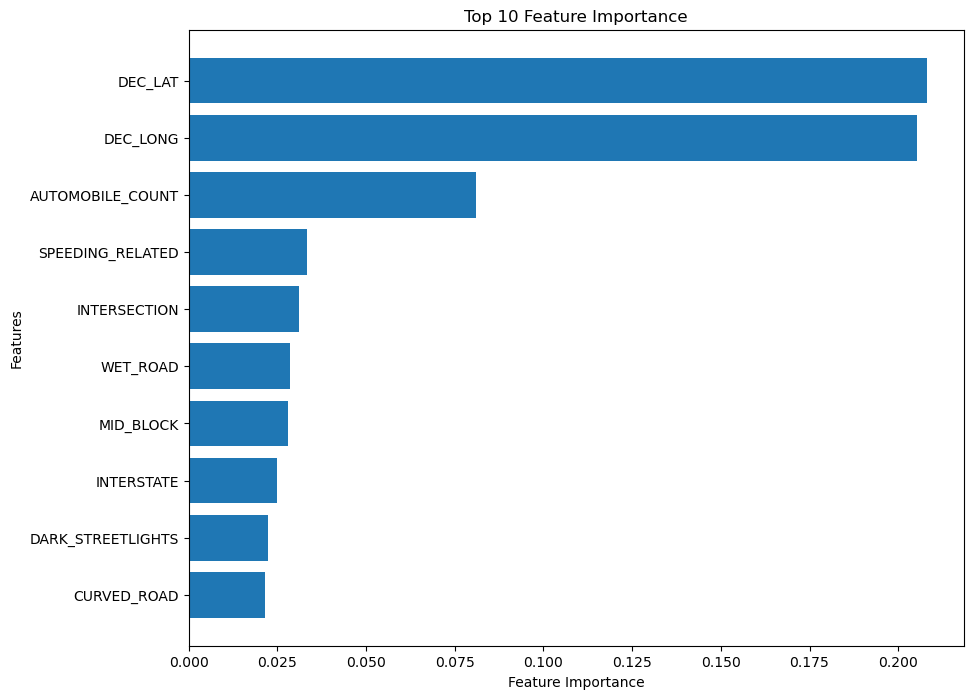

In [902]:
import numpy as np
import matplotlib.pyplot as plt

# Sort the features based on their importances
sort = rf_sampled.feature_importances_.argsort()

# Select the top N important features
n = 10
top_n_features = X_train_sampled.columns[sort][-n:]
top_n_importance = rf_sampled.feature_importances_[sort][-n:]

# Plot the top N important features
plt.figure(figsize=(10, 8))
plt.barh(top_n_features, top_n_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title(f"Top {n} Feature Importance")
plt.show()

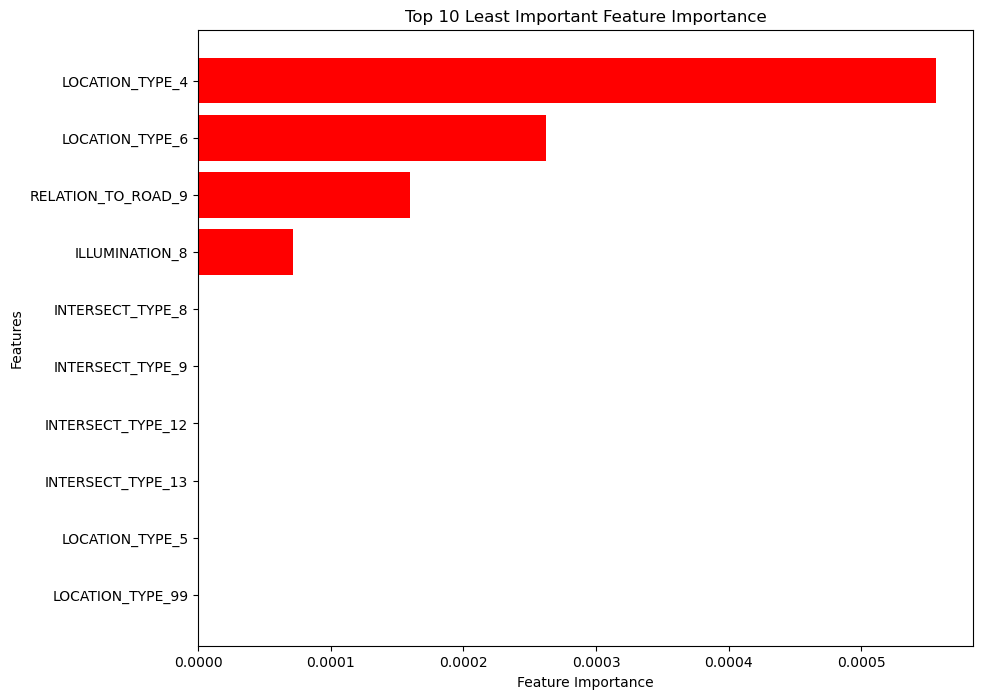

In [903]:
import numpy as np
import matplotlib.pyplot as plt

# Sort the features based on their importances in ascending order
sort = rf_sampled.feature_importances_.argsort()

# Select the top 10 least important features
n = 10
top_n_least_features = X_train_sampled.columns[sort][:n]
top_n_least_importance = rf_sampled.feature_importances_[sort][:n]

# Plot the top 10 least important features in red
plt.figure(figsize=(10, 8))
plt.barh(top_n_least_features, top_n_least_importance, color='red')  # Change color to red
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title(f"Top {n} Least Important Feature Importance")
plt.show()

### Model after reducing our data points

In [904]:
# Drop the 99, 98 and other irrelevant data 
merged_final = merged_final[(merged_final['COLLISION_TYPE'] != 9) &
                            (merged_final['ILLUMINATION'] != 8) &
                            (merged_final['LOCATION_TYPE'] != 0) & 
                            (merged_final['LOCATION_TYPE'] != 99) &
                            (merged_final['RELATION_TO_ROAD'] != 9)]

# Assuming 'merged_final' is your DataFrame
columns_to_encode = ['COLLISION_TYPE', 'ILLUMINATION', 'INTERSECT_TYPE', 'LOCATION_TYPE', 'RELATION_TO_ROAD']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the selected columns
encoded_columns = encoder.fit_transform(merged_final[columns_to_encode])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

merged_final_reset = merged_final.reset_index(drop=True)
encoded_df_reset = encoded_df.reset_index(drop=True)

merged_final = pd.concat([merged_final_reset.drop(columns=columns_to_encode), encoded_df_reset], axis=1)

new_column_names = {
    'ILLUMINATION_1': 'DAYLIGHT',
    'ILLUMINATION_3': 'DARK_STREETLIGHTS',
    'LOCATION_TYPE_3': 'BRIDGE',
    'COLLISION_TYPE_5': 'SIDEWIPE_COLLISION',
    'COLLISION_TYPE_1': 'REAR_END',
    'LOCATION_TYPE_2': 'RAMP',
    'INTERSECT_TYPE_0': 'MID_BLOCK',

}

# Use the rename() method with the dictionary
merged_final.rename(columns=new_column_names, inplace=True)

In [905]:
from sklearn.neighbors import NearestNeighbors

class_0_indices = merged_final[merged_final['camera'] == 0].index
class_1_indices = merged_final[merged_final['camera'] == 1].index
    
selected_indices = np.random.choice(class_1_indices, size=360, replace=False)

# Find the nearest '0' sample for each selected '1' sample
nearest_neighbors = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(merged_final.loc[class_0_indices, ['DEC_LONG', 'DEC_LAT']])
distances, indices = nearest_neighbors.kneighbors(merged_final.loc[selected_indices, ['DEC_LONG', 'DEC_LAT']])

# Include the nearest '0' sample in the final selection
for i, index in enumerate(selected_indices):
    nearest_index = class_0_indices[indices[i][0]]
    selected_indices = np.append(selected_indices, nearest_index)

In [906]:
# Get the sampled data
sampled_data = merged_final.loc[selected_indices]

X_sampled = sampled_data.drop(columns=['camera'])
y_sampled = sampled_data['camera']

X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

In [907]:
rf_sampled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sampled.fit(X_train_sampled, y_train_sampled)

y_pred_rf_sampled = rf_sampled.predict(X_test_sampled)

print(classification_report(y_test_sampled, y_pred_rf_sampled))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93        62
           1       0.94      0.95      0.95        82

    accuracy                           0.94       144
   macro avg       0.94      0.94      0.94       144
weighted avg       0.94      0.94      0.94       144



### Redo the model with the following
- try without long lat

In [908]:
top_n_features

Index(['CURVED_ROAD', 'DARK_STREETLIGHTS', 'INTERSTATE', 'MID_BLOCK',
       'WET_ROAD', 'INTERSECTION', 'SPEEDING_RELATED', 'AUTOMOBILE_COUNT',
       'DEC_LONG', 'DEC_LAT'],
      dtype='object')

In [909]:
top_10 = merged_final.loc[:, top_n_features]

In [910]:
top_10

,CURVED_ROAD,DARK_STREETLIGHTS,INTERSTATE,MID_BLOCK,WET_ROAD,INTERSECTION,SPEEDING_RELATED,AUTOMOBILE_COUNT,DEC_LONG,DEC_LAT
0,1,0.0,1,0.0,0,1,0,2,-74.9986,40.0486
1,0,0.0,0,1.0,0,0,0,0,-75.2005,40.0740
2,1,0.0,0,0.0,1,1,0,2,-74.9958,40.1090
3,0,0.0,0,1.0,0,0,0,3,-75.2160,39.9169
4,0,1.0,0,1.0,0,0,0,0,-75.0809,39.9992
...,...,...,...,...,...,...,...,...,...,...
3715,0,0.0,0,0.0,0,1,0,2,-75.0902,40.0551
3716,0,1.0,0,0.0,0,1,0,0,-75.0564,40.0456
3717,0,1.0,0,1.0,0,0,0,2,-75.1505,40.0200
3718,0,1.0,0,0.0,0,1,0,2,-75.1100,40.0277


In [911]:
X = top_10
y = merged_final['camera']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [912]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       669
           1       0.97      0.47      0.63        75

    accuracy                           0.94       744
   macro avg       0.96      0.73      0.80       744
weighted avg       0.95      0.94      0.94       744



### Using only Lat Long

In [913]:
X = merged_final[['DEC_LAT','DEC_LONG']]
y_sampled = merged_final['camera']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       669
           1       0.96      0.91      0.93        75

    accuracy                           0.99       744
   macro avg       0.97      0.95      0.96       744
weighted avg       0.99      0.99      0.99       744



### SMOTE - oversampling

In [914]:
from imblearn.over_sampling import SMOTE

X = top_10
y = merged_final['camera']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       672
           1       0.93      0.93      0.93       672

    accuracy                           0.93      1344
   macro avg       0.93      0.93      0.93      1344
weighted avg       0.93      0.93      0.93      1344

